In [76]:
import pandas as pd
import numpy as np

import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [77]:
data = pd.read_csv('housing_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2359 non-null   int64  
 1   Price                1608 non-null   object 
 2   Headline             1608 non-null   object 
 3   Address              1598 non-null   object 
 4   Owner                1893 non-null   object 
 5   Bedrooms             1710 non-null   object 
 6   Bathrooms            2027 non-null   object 
 7   Balconies            671 non-null    object 
 8   Super area           2031 non-null   object 
 9   Price Per sqft       2302 non-null   object 
 10  Status               2211 non-null   object 
 11  Transaction type     2359 non-null   object 
 12  Floor                2277 non-null   object 
 13  Car parking          2332 non-null   object 
 14  Furnished            1443 non-null   object 
 15  Lifts                263 non-null    o

**Data Processing**

In [78]:
bhkList = []
bhkRegex = re.compile("([^BHK]+)")
for desc in data.Headline:
  desc = str(desc)
  bhk = bhkRegex.search(desc)
  bhk = bhk.group(1)[:-1]
  if bhk.isdigit():
    bhkList.append(float(bhk))
  else:
    bhkList.append(-1.0)
    
data['Bhk'] = bhkList
data.Bhk

0       1.0
1      -1.0
2       1.0
3       2.0
4      -1.0
       ... 
2354   -1.0
2355   -1.0
2356   -1.0
2357   -1.0
2358    2.0
Name: Bhk, Length: 2359, dtype: float64

In [79]:
floorList = []
for desc in data.Floor:
  desc = str(desc)
  num = desc.split()[0]
  if num.isdigit():
    floorList.append(float(num))
  else:
    floorList.append(-1.0)

data.Floor = floorList
data.Floor

0       48.0
1        7.0
2        7.0
3       -1.0
4       -1.0
        ... 
2354    10.0
2355    38.0
2356    52.0
2357     4.0
2358     5.0
Name: Floor, Length: 2359, dtype: float64

In [80]:
areaList = []
areaRegex = re.compile("([^sqft]+)")
for desc in data['Super area']:
  desc = str(desc)
  area = areaRegex.search(desc)
  area = area.group(1)[:-1]
  if area.isdigit():
    areaList.append(float(area))
  else:
    areaList.append(-1.0)

data['Area'] = areaList
data['Area']

0         -1.0
1         -1.0
2         -1.0
3        622.0
4         -1.0
         ...  
2354     806.0
2355    2300.0
2356    1050.0
2357    1968.0
2358      -1.0
Name: Area, Length: 2359, dtype: float64

In [81]:
priceList = []
for desc in data.Price:
  amnt = str(desc)
  amnt = amnt.split()
  if len(amnt)>1 and amnt[1]=='Lac':
    priceList.append(float(amnt[0]))
  else:
    priceList.append(float(amnt[0])*100)

data.Price = priceList
data.Price

0        99.0
1         NaN
2        76.0
3       154.0
4         NaN
        ...  
2354      NaN
2355      NaN
2356      NaN
2357      NaN
2358    135.0
Name: Price, Length: 2359, dtype: float64

**Data Visulaization using seaborn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

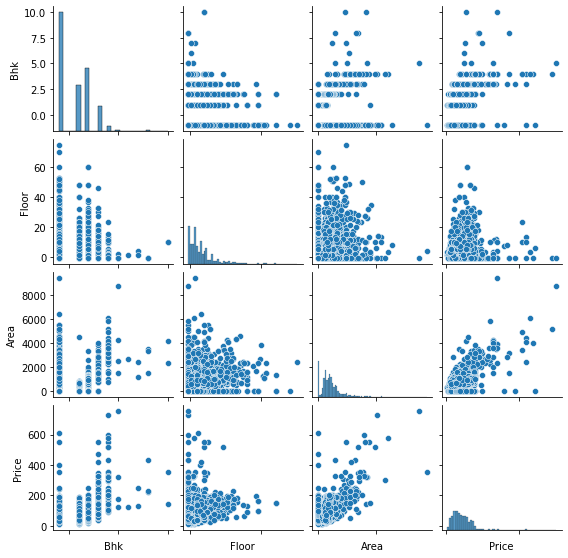

In [82]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(data[['Bhk', 'Floor', 'Area', 'Price']] , size=2)
g.set(xticklabels=[])

**Co relation between Variables**

*We wil use heatmap to view the co relation between variables*


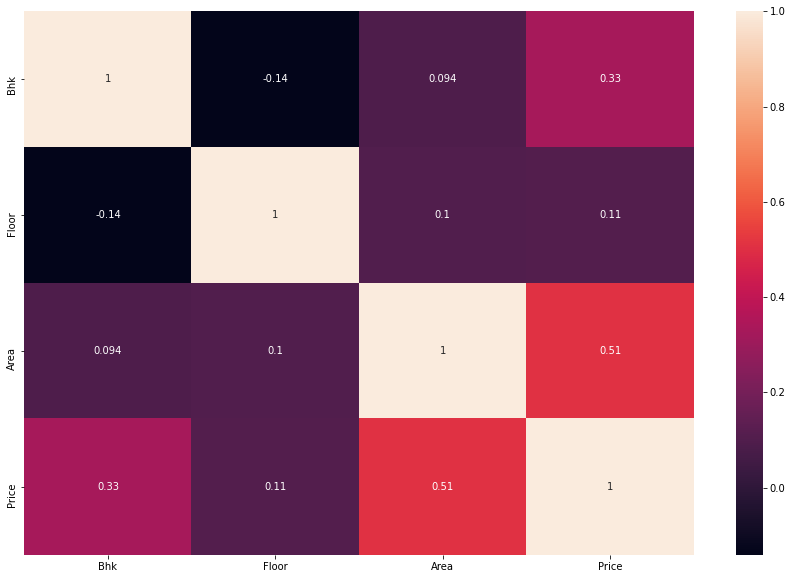

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(data[['Bhk', 'Floor', 'Area', 'Price']].corr(),annot=True)

**Loading and splitting data into train and test dataset**

In [84]:
data = data[['Bhk', 'Floor', 'Area', 'Price']].copy()
data = data.dropna()

x = data[['Bhk', 'Floor', 'Area']].copy()
y = data[['Price']].copy()

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size=0.1, random_state=42, shuffle=True)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1447, 3) (161, 3) (1447, 1) (161, 1)


**Linear Regression Model**

In [86]:
mlr            = LinearRegression()

mlr.fit(x_train,y_train)

mlr_score      = mlr.score(x_test,y_test)
pred_mlr       = mlr.predict(x_test)
expl_mlr       = explained_variance_score(pred_mlr,y_test)

**Decision Tree Model**

In [87]:
tr_regressor   = DecisionTreeRegressor(random_state=0)

tr_regressor.fit(x_train,y_train)
tr_regressor.score(x_test,y_test)

pred_tr        = tr_regressor.predict(x_test)
decision_score = tr_regressor.score(x_test,y_test)
expl_tr        = explained_variance_score(pred_tr,y_test)

**Random Forest Model**

In [88]:
rf_regressor   = RandomForestRegressor(n_estimators=28,random_state=0)

rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test,y_test)

rf_pred        = rf_regressor.predict(x_test)
rf_score       = rf_regressor.score(x_test,y_test)
expl_rf        = explained_variance_score(rf_pred,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**Calculate Model Score**

Let's calculate the model score to understand how our model performed along with the explained variance score.

In [89]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(x_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(x_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(x_test,y_test)*100))


models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })

models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  1
Decision tree  Regression Model Score is  -10
Random Forest Regression Model Score is  20


,Model,Score,Explained Variance Score
2,Random forest Regression,0.196237,-0.255906
0,Multiple Linear Regression,0.010832,-2.317396
1,Decision Tree,-0.098483,0.021375
